# Hausaufgabe 3
## Particle Image Velocimetry
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Zur Charakterisierung der Bewegung in einem Strömungsfeldes findet häufig das optische Messverfahren [Particle Image Velocimetry (PIV)](https://de.wikipedia.org/wiki/Particle_Image_Velocimetry) Anwendung.
Hierfür werden in das Fluid eingebrachte Partikel mit einem zur Ebene aufgeweiteten Laserstrahl beleuchtet und in kurzen Abständen nacheinander fotografiert.
Aus der Ortsveränderung der Partikel und dem bekannten Abstand zwischen den Aufnahmen können die Geschwindigkeitsvektoren bestimmt werden.

Es sollen Funktionen geschrieben werden, mit deren Hilfe sich Berechnung und Visualisierung eines Geschwindigkeits-Vektorfeldes basierend auf zwei aufgenommenen Bildern realisieren lassen.

Zunächst werden einige Module importiert, die hilfreiche Funktionen zur Verfügung stellen:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

**1) Schreiben Sie eine Funktion *loaddata()* die zwei Arrays mit (Bildhöhe) $\times$ (Bildbreite) Einträgen zurückgibt, die die Bildinformationen (Helligkeitswerte als Zahl) enthalten.**

  * Als Parameter sollen hierfür zwei Dateipfade übergeben werden. Das Einlesen kann z.B. mittels [imread](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html) geschehen.
  * Eventuell im Bild enthaltene Farbinformationen sind hier nicht weiter von Interesse. Sind im Bild mehrere Farbkanäle pro Pixel enthalten (z.B. RGB), soll die Information auf einen Kanal reduziert werden.
  * Es soll direkt überprüft werden, ob beide Bilder dieselben Abmaße haben. Andernfalls ist eine Fehlermeldung auszugeben: 
  ```python 
        raise ValueError('Dimensions of input images do not match!')
  ```

In [3]:
# Hier eigenen Code schreiben ...
from numpy import array, sin, cos, pi, dot, linspace, arange, newaxis, mean
from numpy.random import randn
from matplotlib.pyplot import figure, plot, axis, grid, imshow, show, legend
import os
import math


os.chdir('C:\\Users\\Fabio\\Desktop\\Python\\HA3')
os.getcwd()

Bild=plt.imread('C:\\Users\\Fabio\\Desktop\\Python\\test.jpg')


## Funktion ließt zwei Bilder ein und rechnet diese um
def loaddata(Pfad1 , Pfad2):
    
    Bild1=plt.imread(Pfad1)
    Bild2=plt.imread(Pfad2)
    
    if Bild1.shape==Bild2.shape:
        
        if len(Bild1.shape)!=2:

            SW1 = Bild1[:, :, 0]
            SW2 = Bild2[:, :, 0]
            for i in range(1,Bild1.shape[-1]):        

                SW1=SW1 + Bild1[:, :, i]
                SW2=SW2 + Bild2[:, :, i] 

            SW1=SW1//Bild1.shape[-1]
            SW2=SW2//Bild2.shape[-1]

        else:
            SW1 = Bild1
            SW2 = Bild2
        
        return SW1, SW2
    
    else:
        raise ValueError('Dimensions of input images do not match!')
        
        
#loaddata( 'C:\\Users\\Fabio\\Desktop\\Python\\HA3\\test.jpg' , 'C:\\Users\\Fabio\\Desktop\\Python\\test.jpg' )



**2) Testen Sie das Laden der Dateien. Die verwendeten Dateien finden Sie im separaten Archiv "*img_HA3.zip*".**

  * **Geben Sie die Dimensionen der zurückgegebenen Arrays an, wenn Sie als Input die folgenden Dateipaare verwenden:**

|Bild 1| Bild 2|
|-|-|
|[B005_1.tif](http://www.pivchallenge.org/pub/index.html#b)|[B005_2.tif](http://www.pivchallenge.org/pub/index.html#b)|
|[B038a.bmp](http://www.pivchallenge.org/pub03/index.html#b)|[B038b.bmp](http://www.pivchallenge.org/pub03/index.html#b)|
|[B_010.TIF](http://www.pivchallenge.org/pub05/index.html#b)|[B_014.TIF](http://www.pivchallenge.org/pub05/index.html#b)|
|[A001_1.tif](http://www.pivchallenge.org/pub/index.html#a)|[A001_2.tif](http://www.pivchallenge.org/pub/index.html#a)|
|[A045a.tif](http://www.pivchallenge.org/pub03/index.html#a)|[A045b.tif](http://www.pivchallenge.org/pub03/index.html#a)|

  * **Überprüfen Sie das Verhalten Ihrer Funktion, wenn folgendes Dateipaar geladen wird:**
  
|Bild 1| Bild 2|
|-|-|
|[B038a.bmp](http://www.pivchallenge.org/pub03/index.html#b)|[A001_1.tif](http://www.pivchallenge.org/pub05/index.html#c)|

Die Bilddateien sind Testfälle der "PIV Challenge"-Benchmark-Initiative (http://www.pivchallenge.org/). Die Quellen der jeweiligen Bilder sind in der Tabelle verlinkt.

In [4]:
#Hier eigenen Code schreiben ...

# B005_1.tif und B005_2.tif
B005_1, B005_2 = loaddata( 'B005_1.tif' , 'B005_2.tif' )

print('Die Dimension der Bilder B005_1.tif und B005_2.tif sind', B005_1.shape )

# B038a.bmp und B038b.bmp
B038a, B038b = loaddata( 'B038a.bmp' , 'B038b.bmp' )

# B_010.TIF und B_014.TIFB_010, B_014 = loaddata( 'B_010.TIF' , 'B_014.TIF' )

# A001_1.tif und A001_2.tif
A001_1, A001_2 = loaddata( 'A001_1.tif' , 'A001_2.tif' )

# A045a.tif und A045b.tif
A045a, A045b = loaddata( 'A045a.tif' , 'A045b.tif' )


#Testpaar B038a.bmp	und A001_1.tif
#B038a, A001_1 = loaddata( 'B038a.bmp' , 'A001_1.tif' )


Die Dimension der Bilder B005_1.tif und B005_2.tif sind (512, 512)


 * **Laden Sie die Daten aus dem Dateipaar (`B005_1.tif`, `B005_2.tif`) und visualisieren Sie den jeweiligen Array-Inhalt in zwei benachbarten Plots.**

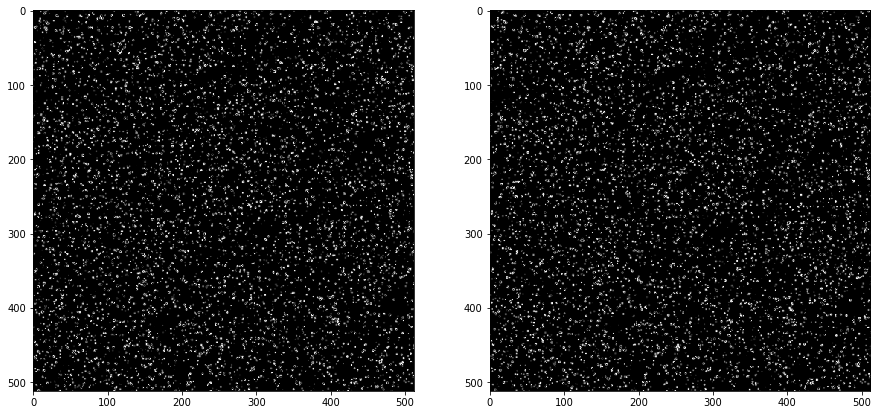

In [5]:
# Hier eigenen Code schreiben ...


fig, ax = plt.subplots(1,2, figsize = (15, 10))

#fig=plt.figure(figsize=(18, 16))
#plt.figure(1,(15,10))

ax[0].imshow(B005_1, cmap='gray')

ax[1].imshow(B005_2, cmap='gray')




**3) Schreiben Sie eine Funktion *piv()*, die zwei Dateipfade übergeben bekommt und basierend auf den Bilddaten ein Geschwindigkeitsvektorfeld berechnet.**

  * **Zusätzlich zu den beiden Dateipfaden sollen optional mindestens folgende Parameter übergeben werden können:**
    * *size_interr_window*: Seitenlänge (in Pixel) des quadratischen Ausschnitts, dessen Bewegung untersucht werden soll. Standardwert: $20$
    * *size_search_window*: Seitenlänge (in Pixel) des quadratischen Ausschnitts, innerhalb dessen die höchste Korrelation gesucht werden soll. Der Wert muss sinnvollerweise mindestens so groß wie *size_interr_window* sein (andernfalls Fehlermeldung ausgeben). Standardwert: *None* (setzen auf *size_interr_window*, falls nicht angegeben)
  * **Folgende Werte sollen zurückgegeben werden:**
    * *X*, *Y*: jeweils 2D-Arrays, die das Pixel-Koordinatengitter zum Vektorfeld definieren.
    * *U*, *V*: jeweils 2D-Arrays (Dimensionen entsprechen (*len(x), len(y)*), die die Geschwindigkeitskomponenten in x- und y-Richtung enthalten.

Hinweise:

  * Sinnvollerweise kann zum Laden der Dateien direkt obige Funktion *loaddata()* verwendet werden.
  * Die Größe des zurückgegebenen Vektorfeldes bestimmt sich aus der Größe der Ausgangsbilder, der Größe der Interrogationsfenster sowie der Suchfenster.
  * Ein mit Nullen gefülltes Array lässt sich z.B. mit NumPys [*zeros()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)-Funktion erzeugen.
  * Die quadratischen *Interrogations*fenster grenzen immer direkt aneinander. Ein zu einem Interrogationsfenster gehörendes *Such*fenster hat den gleichen Mittelpunkt wie das Interrogationsfenster.
  * Eine zweidimensionale Kreuzkorrelation lässt sich z.B. mit den Funktionen [*correlate2d()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html) oder [*fftconvolve()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html) aus dem Paket *scipy.signal* berechnen.
  * Für eine leichtere Fehlersuche ist es sinnvoll, mit Testausgaben (oder -plots) zu überprüfen, ob Zwischenschritte den Erwartungen entsprechen.
  * Um aus einem Vektor mit x-Koordinaten und einem Vektor mit y-Koordinaten ein 2D-Gitter aufzuspannen (auf dem alle x- und y-Koordinaten kombiniert werden), kann die NumPy-Funktion [*meshgrid()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) verwendet werden.

    

min Inter: 6
mean Inter: 11.697701149425287
cordiff:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Maximum 43304.12995111643
(27, 9)
MittelpunktX 29.0
MittelpunktY 28.0
U [20.]
V [1.]


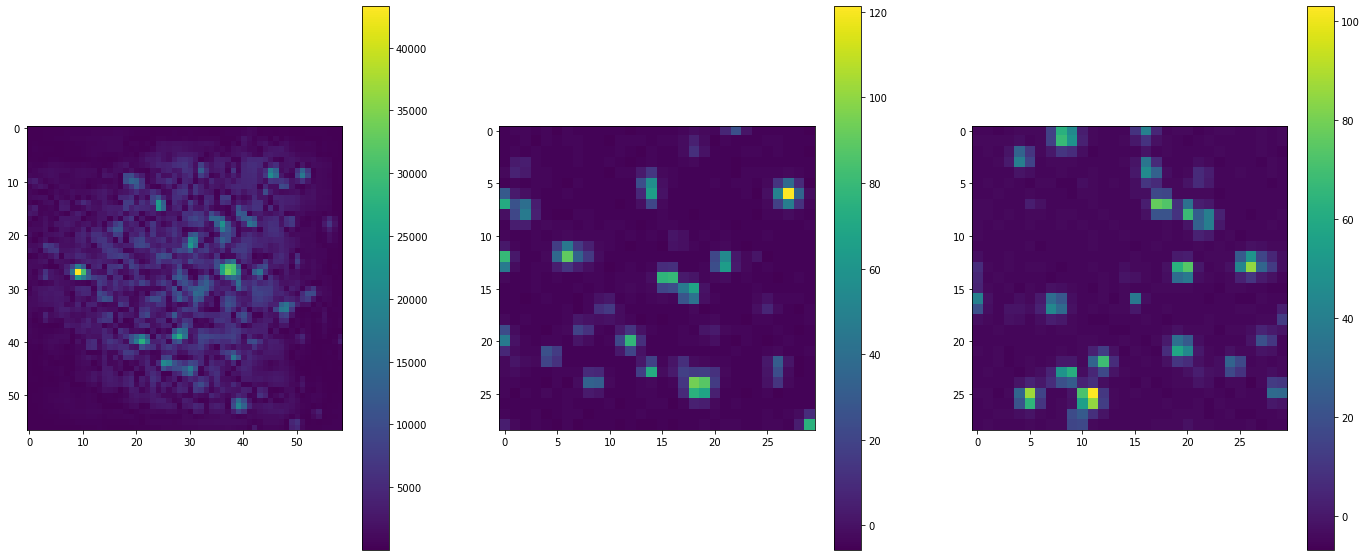

In [64]:

Bild1, Bild2 = loaddata('B_010.TIF' , 'B_014.TIF' )


Breite_S=5
Hoehe_S=5

X,Y=np.meshgrid( range(0,Breite_S) , range(0,Hoehe_S) )

#Z=sin(2*pi*X/Breite)+cos(2*pi*Y/Hoehe)
#Z=np.zeros((Hoehe_S, Breite_S))
#Z[2,2]=1

# Ausschnitt von den Bildern  Z_U ist eine Untermenge von Z


Inter_window   = Bild1[ 658:-1, 250:280 ]
Search_window  = Bild2[ 658:-1, 250:280 ] 


print('min Inter:' , np.amin(Inter_window))
print('mean Inter:' , np.mean(Inter_window))


Inter_window  = Inter_window  - np.mean(Inter_window)
Search_window = Search_window - np.mean(Search_window)



# Inter_window = np.zeros( ( 5 , 5 ) )
# Inter_window[4,0] = 1

# Search_window = np.zeros( ( 5 , 5 ) )
# Search_window[3,3] = 1 


#size_interr_window=2
#size_search_window=4
#Z=Test
#Z_U=Test1

Breite_I= Inter_window.shape[1]
Hoehe_I = Inter_window.shape[0]


cor = signal.correlate2d( Inter_window, Search_window )  #, mode='valid'

cor1 = signal.correlate2d( Inter_window, Search_window )

print('cordiff: ' , cor-cor)

print('Maximum', np.amax(cor) )


wo = np.where(cor == np.amax(cor))
listOfCordinates = list(zip(wo[0], wo[1]))

if len(listOfCordinates) != 1: # Gibt es mehrere Maxima
    print('Es gibt mehrere Maxima der Korrelationsfunktion')

# travese over the list of cordinates
for cord in listOfCordinates:
    print(cord)

U = - wo[1] + (cor.shape[1]-1)/2 

V = - wo[0] + (cor.shape[0]-1)/2 

print('MittelpunktX', (cor.shape[1]-1)/2 ) 
print('MittelpunktY', (cor.shape[0]-1)/2 )
print('U', U ) 
print('V', V ) 

if len(listOfCordinates) != 1:
    print('mean U', np.average(U) )   # nicht mehr nötig, da durch die verschiebung um den Mittelwert nur 1 maximum gefunden wird
    print('mean V', np.average(V) ) 

fig, ax = plt.subplots(1,3, figsize = (24, 10))

#fig=plt.figure(figsize=(18, 16))
#plt.figure(1,(15,10))

j=ax[0].imshow(abs(cor))

i=ax[1].imshow(Inter_window)

im=ax[2].imshow(Search_window)

plt.colorbar(j,ax=ax[0])
plt.colorbar(i,ax=ax[1])
plt.colorbar(im,ax=ax[2])


**4) Erstellen Sie mit Hilfe der *piv()*-Funktion für jeden Datensatz drei Darstellungen:**
  1. Einen Plot mit [Vektorpfeilen](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html), der die Strömungsrichtungen der Partikel(-Gruppen) visualisiert. *Hinweis: Beachten Sie den optionalen Parameter "angles" für eine korrekte Darstellung.*
  2. Eine [Stromlinienvisualisierung](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html).
  3. Einen [Konturplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html), der den Betrag der Geschwindigkeitsverteilung abbildet.

**Variieren Sie die Parameter der *piv()*-Funktion sowie der jeweiligen Plot-Funktion, um eine möglichst aussagekräftige Abbildung zu erhalten. Hinterlegen Sie den Plots zur besseren Übersicht eines der jeweiligen Partikelbilder.**

**5) Zusatzaufgaben (freiwillig):**
  * Fügen Sie einen optionalen Parameter "overlap" – und die entsprechende Implementierung – für überlappende Interrogationsfenster hinzu.
  * Aktuell können nur Geschwindigkeits-Vektoren mit Pixelgenauigkeit gefunden werden. Überlegen Sie, ob bzw. wie genauere Werte berechnet werden könnten.
  * Wie könnte das Ergebnis verbessert werden, die auftretenden Geschwindigkeiten stark variieren?